# Plotting Exploration

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

RANDOM_SEED = 42

In [2]:
summary_df = pd.read_excel("data/supervised_learning_output_metrics.xlsx", header=[0,1, 2], index_col=[0])
summary_df

Most Frequent Dummy Classifier                           \
                         10 PCs_imbalanced                            
                                 precision recall  f1-score support   
Alveolar                          0.000000      0  0.000000      92   
B cell                            0.000000      0  0.000000     855   
CD4 T                             0.000000      0  0.000000    2119   
CD8 T                             0.248141      1  0.397617    2503   
DC                                0.000000      0  0.000000     101   
Endothelial                       0.000000      0  0.000000     317   
Epithelial                        0.000000      0  0.000000      43   
Mast                              0.000000      0  0.000000     117   
Myeloid                           0.000000      0  0.000000    1810   
NK                                0.000000      0  0.000000     176   
RBC                               0.000000      0  0.000000     187   
Stromal                           0.000000      0  0.000000     306   
Tumor                             0.000000      0  0.000000    1441   
pDC                               0.000000      0  0.000000      20   

                                                                               \
            10 PCs_balanced                          25 PCs_imbalanced          
                  precision recall  f1-score support         precision recall   
Alveolar           0.009121      1  0.018076      92          0.000000      0   
B cell             0.000000      0  0.000000     855          0.000000      0   
CD4 T              0.000000      0  0.000000    2119          0.000000      0   
CD8 T              0.000000      0  0.000000    2503          0.248141      1   
DC                 0.000000      0  0.000000     101          0.000000      0   
Endothelial        0.000000      0  0.000000     317          0.000000      0   
Epithelial         0.000000      0  0.000000      43          0.000000      0   
Mast               0.000000      0  0.000000     117          0.000000      0   
Myeloid            0.000000      0  0.000000    1810          0.000000      0   
NK                 0.000000      0  0.000000     176          0.000000      0   
RBC                0.000000      0  0.000000     187          0.000000      0   
Stromal            0.000000      0  0.000000     306          0.000000      0   
Tumor              0.000000      0  0.000000    1441          0.000000      0   
pDC                0.000000      0  0.000000      20          0.000000      0   

             ... Neural Network with 2 layers, 10 units each          \
             ...                            200 PCs_balanced           
             ...                                    f1-score support   
Alveolar     ...                                    0.863905      92   
B cell       ...                                    0.813848     855   
CD4 T        ...                                    0.717013    2119   
CD8 T        ...                                    0.845734    2503   
DC           ...                                    0.110236     101   
Endothelial  ...                                    0.940994     317   
Epithelial   ...                                    0.976744      43   
Mast         ...                                    0.943723     117   
Myeloid      ...                                    0.932640    1810   
NK           ...                                    0.096257     176   
RBC          ...                                    0.066176     187   
Stromal      ...                                    0.875740     306   
Tumor        ...                                    0.946816    1441   
pDC          ...                                    0.000000      20   

                                                                             \
            300 PCs_imbalanced                             300 PCs_balanced   
                     precision    recall  f

## Summary Statistics

It would be good to generate some summary statistics for different groupings. Things like summary stats by number of PC's and model would be good to have so we can see the best performing model

In [3]:
set(summary_df.columns.get_level_values(0))

{'Decision Tree with Max Depth=14',
 'Decision Tree without Max Depth',
 'Gradient-boosted Decision Tree',
 'Most Frequent Dummy Classifier',
 'Naive Bayes Classifier',
 'Neural Network with 1 layer, 100 units',
 'Neural Network with 2 layers, 10 units each',
 'Random Forest',
 'SVM Classifier with C=10',
 'Stratified Dummy Classifier',
 'kNN with k=10'}

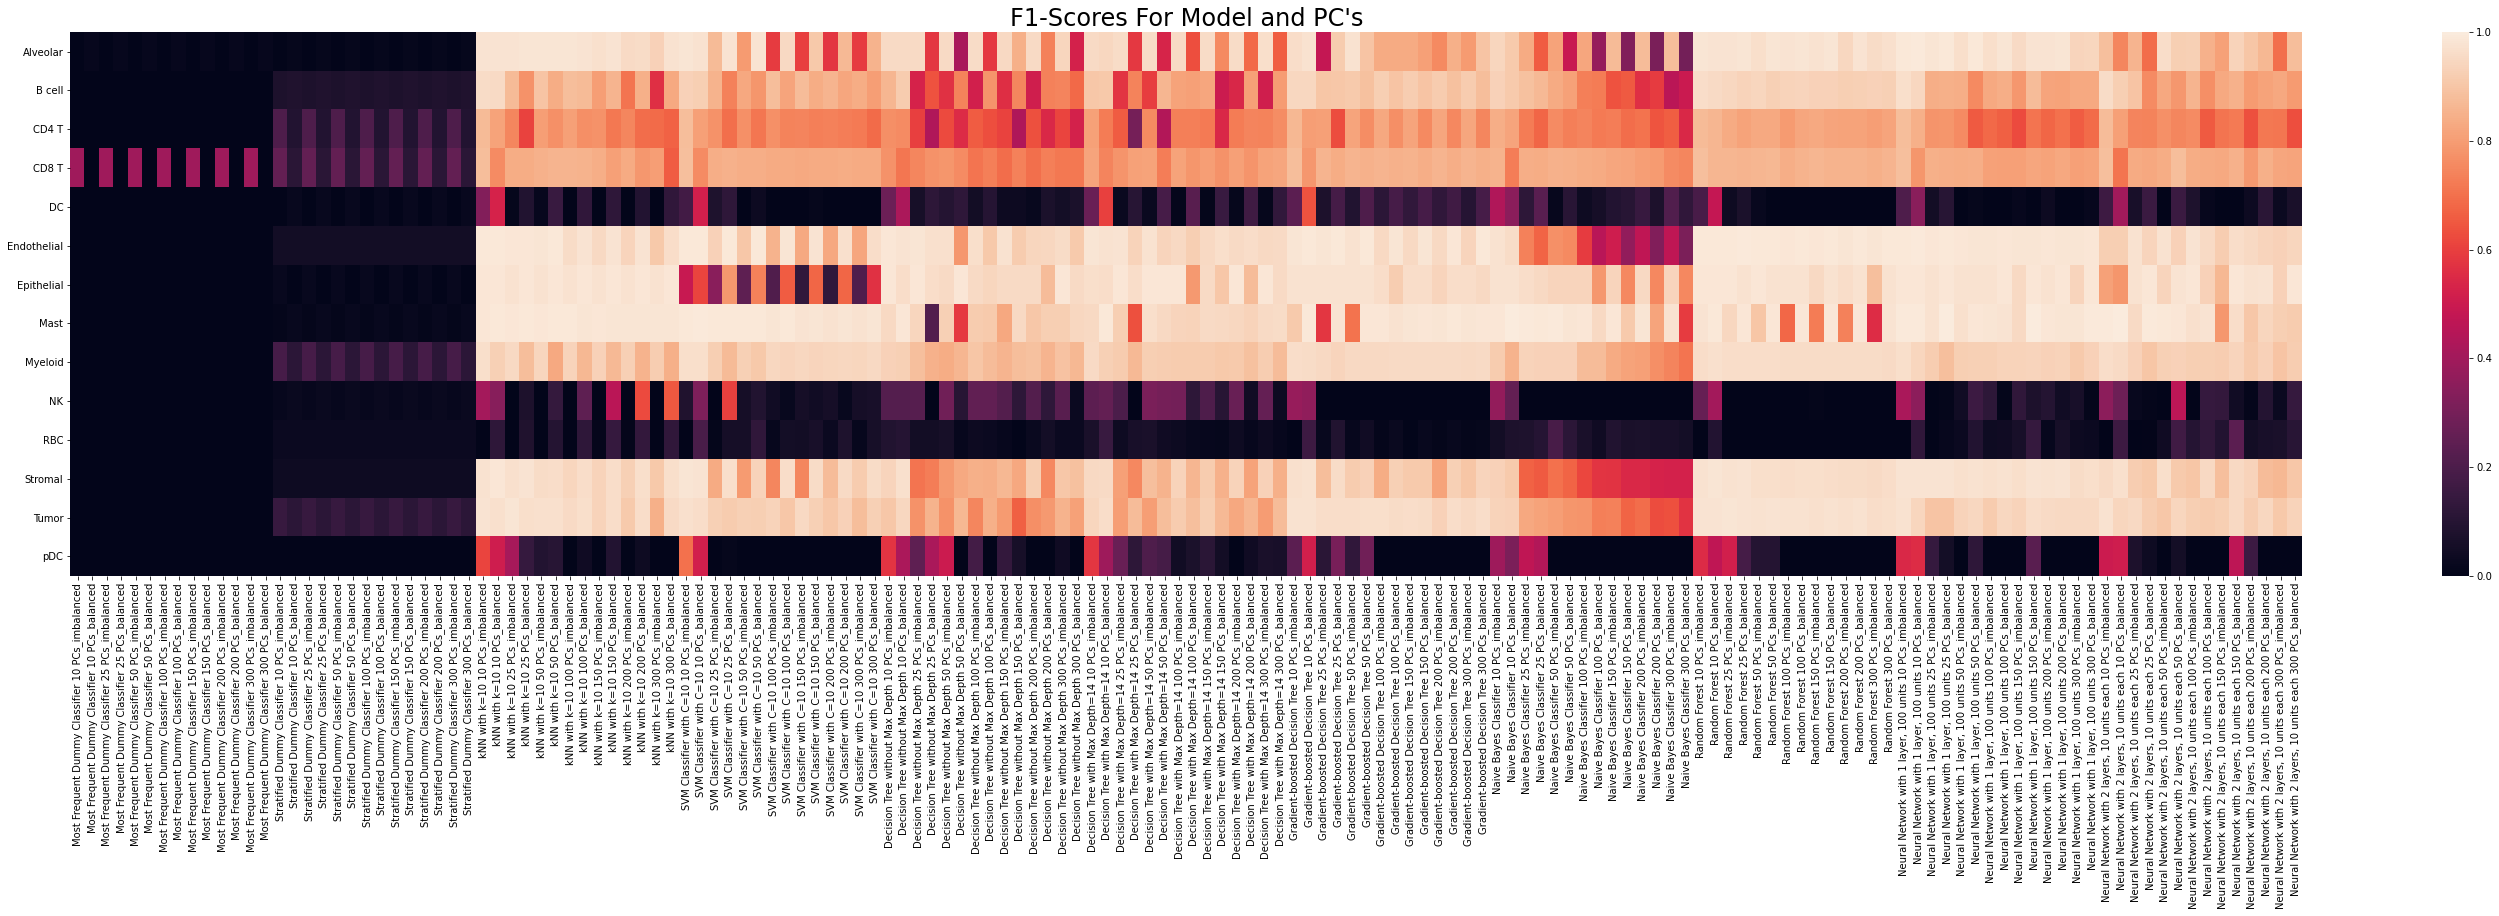

In [4]:
plt.rcParams["figure.figsize"] = (50,10)
f1_scores = summary_df.loc[:, pd.IndexSlice[:, :, ['f1-score']]]
f1_scores.columns = [' '.join(x) for x in zip(f1_scores.columns.get_level_values(0), f1_scores.columns.get_level_values(1))]
sns.heatmap(f1_scores, xticklabels=1)
plt.title("F1-Scores For Model and PC's", fontsize=24)
plt.savefig('figures/f1-scores_model_pcs.jpg', bbox_inches='tight')

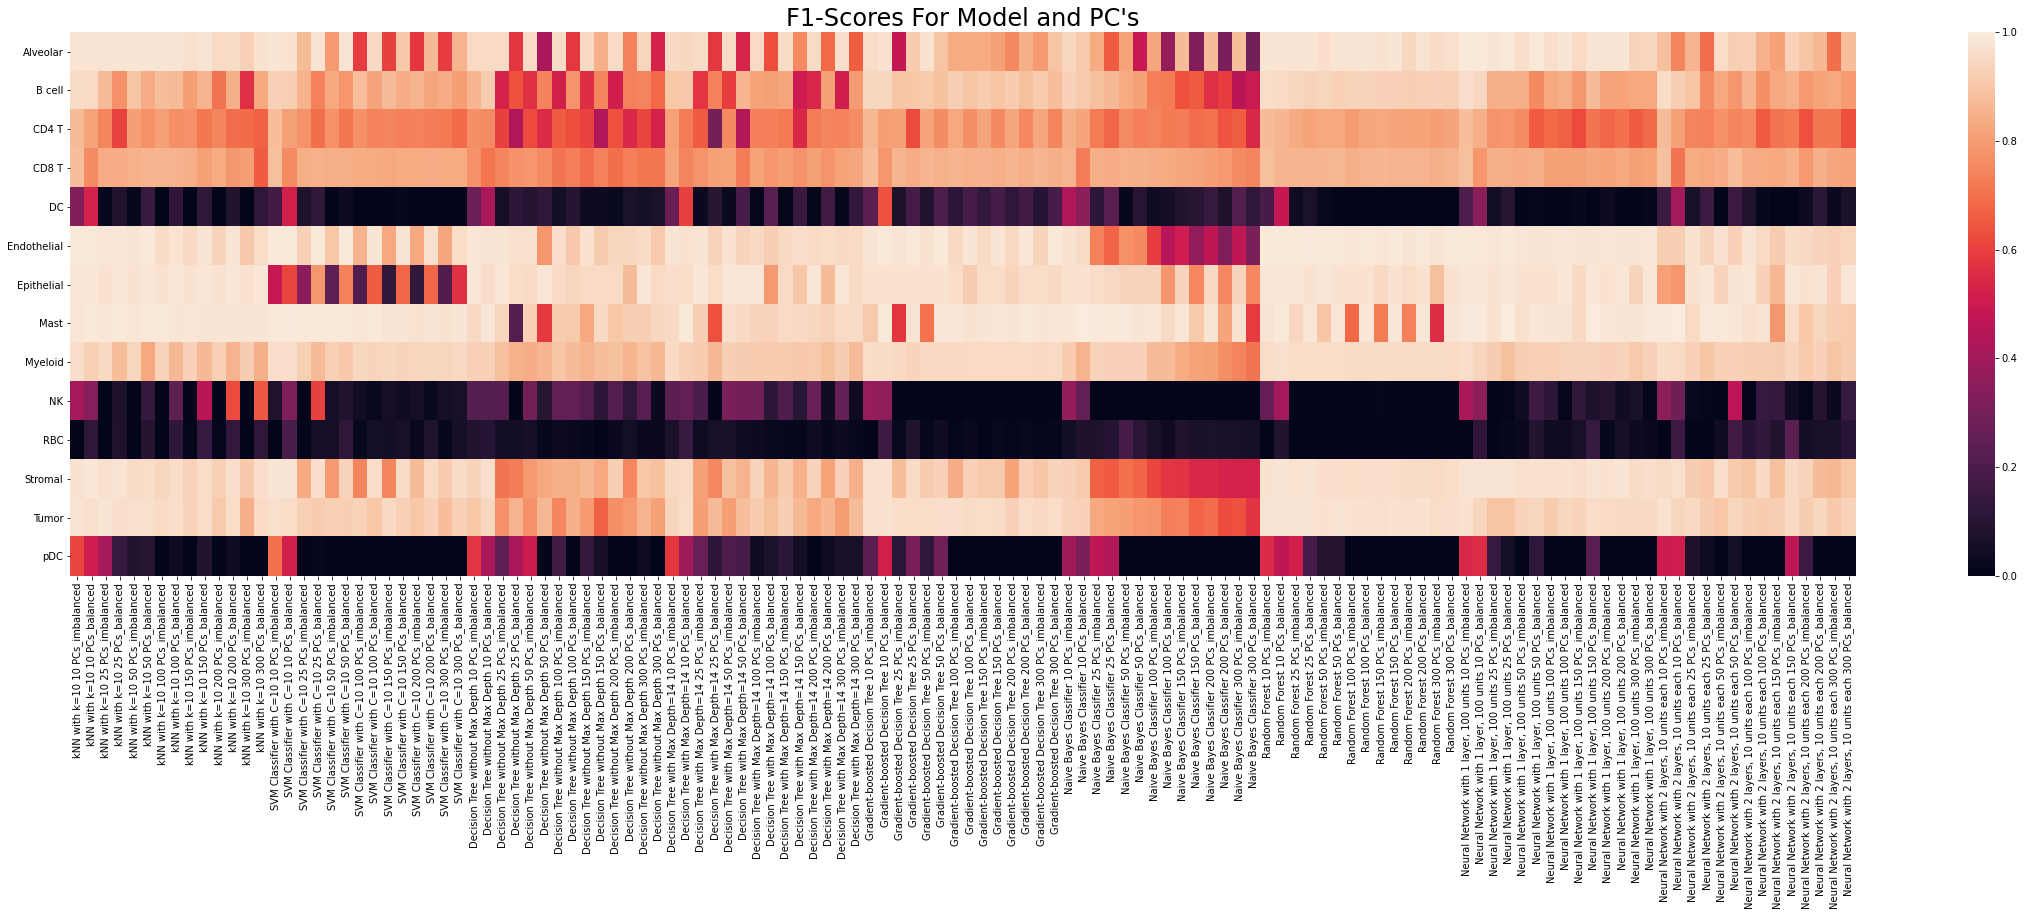

In [5]:
# Generate the same heatmap as above, this time removing the dummy classifiers
plt.rcParams["figure.figsize"] = (40,10)
non_dummy_models = ['kNN with k=10', 'SVM Classifier with C=10', 'Decision Tree without Max Depth', 'Decision Tree with Max Depth=14','Gradient-boosted Decision Tree',
                    'Naive Bayes Classifier', 'Random Forest', 'Neural Network with 1 layer, 100 units', 'Neural Network with 2 layers, 10 units each']
f1_scores = summary_df.loc[:, pd.IndexSlice[non_dummy_models, :, ['f1-score']]]
f1_scores.columns = [' '.join(x) for x in zip(f1_scores.columns.get_level_values(0), f1_scores.columns.get_level_values(1))]
sns.heatmap(f1_scores, xticklabels=1)
plt.title("F1-Scores For Model and PC's", fontsize=24)
plt.savefig('figures/f1-scores_model_pcs_no_dummy.jpg', bbox_inches='tight')

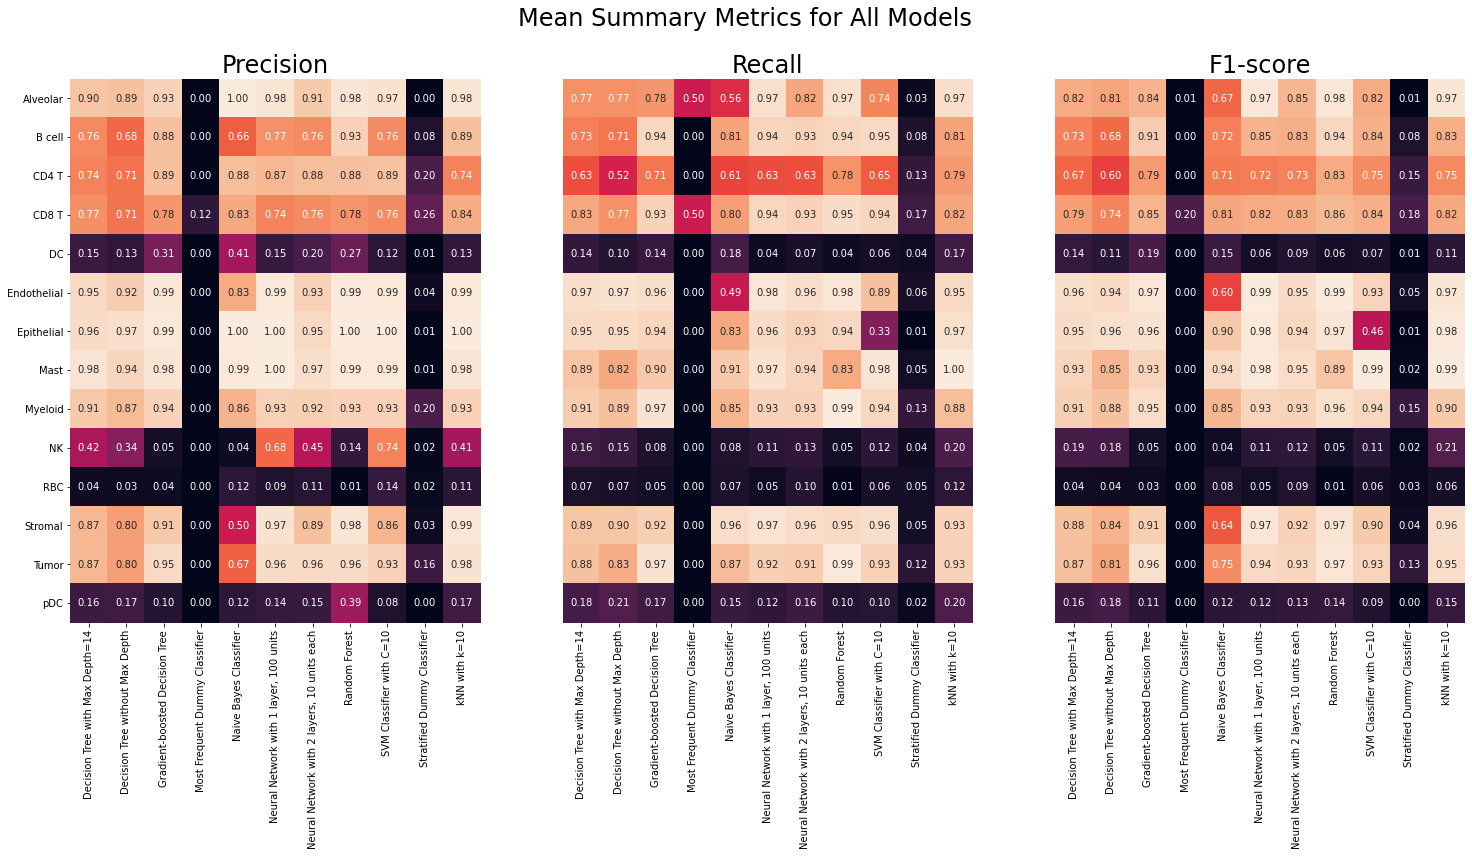

In [6]:
# Generate a heatmap at the model-level using mean for all PC's
plt.rcParams["figure.figsize"] = (25,10)
fig, axs = plt.subplots(ncols=3)
axs = axs.ravel()
fig.suptitle("Mean Summary Metrics for All Models", fontsize=24, y=0.98)
model_grouped_df = summary_df.groupby(level=[0, 2], axis=1).mean()
metric_info = {'precision': [0, True],
              'recall': [1, False],
              'f1-score': [2, False]}
for k, v in metric_info.items():
    model_grouped_df_f1_score = model_grouped_df.loc[:, pd.IndexSlice[:, [k]]]
    model_grouped_df_f1_score.columns = model_grouped_df_f1_score.columns.get_level_values(0)
    sns.heatmap(model_grouped_df_f1_score, annot=True, xticklabels=1, ax=axs[v[0]], cbar=False, yticklabels=v[1], fmt='.2f')
    axs[v[0]].set_title(k.capitalize(), fontdict={'fontsize':24})
plt.savefig('figures/summary_metrics_by_model.jpg', bbox_inches='tight')

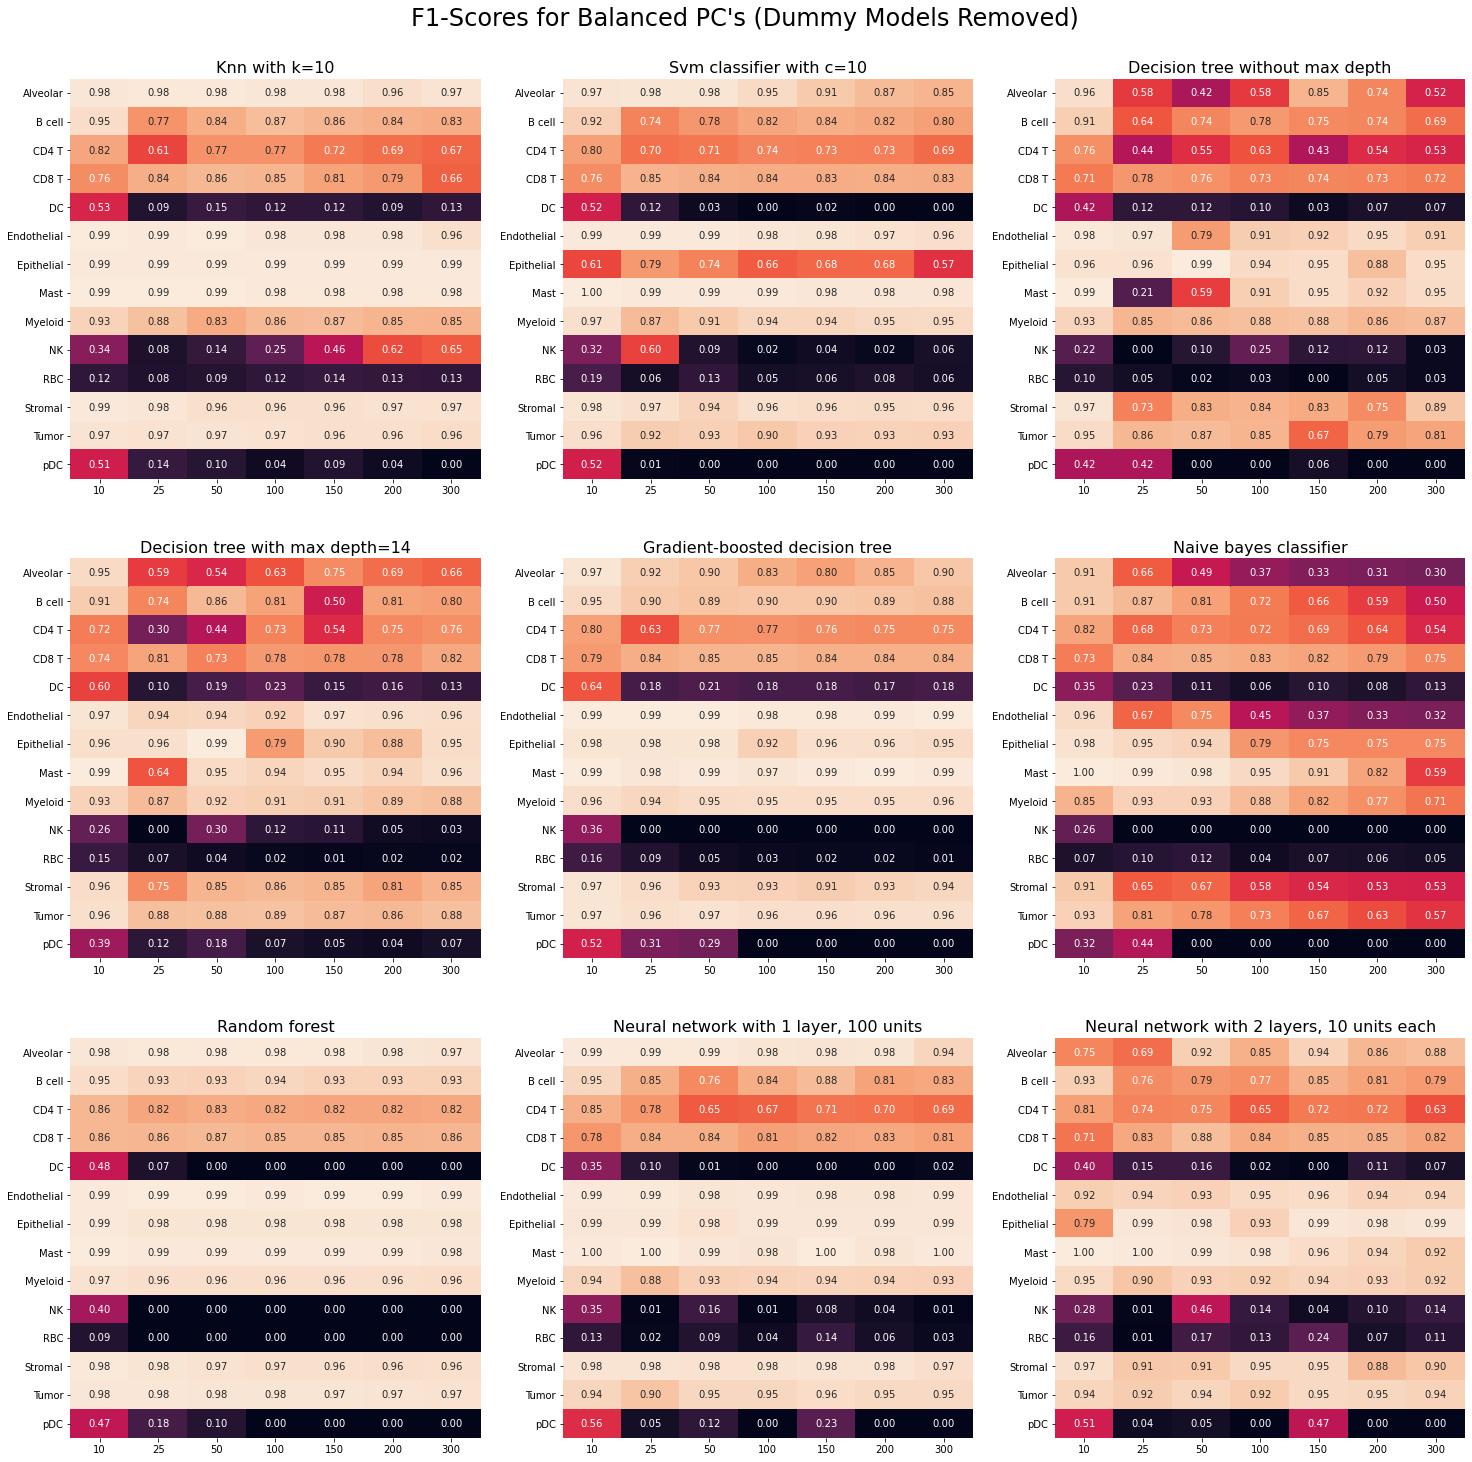

In [7]:
#Plot the F1-scores for the balanced PC's
non_dummy_models = ['kNN with k=10', 'SVM Classifier with C=10', 'Decision Tree without Max Depth', 'Decision Tree with Max Depth=14','Gradient-boosted Decision Tree',
                    'Naive Bayes Classifier', 'Random Forest', 'Neural Network with 1 layer, 100 units', 'Neural Network with 2 layers, 10 units each']
balanced_pcs = ['10 PCs_balanced', '25 PCs_balanced', '50 PCs_balanced', '100 PCs_balanced', '150 PCs_balanced', '200 PCs_balanced', '300 PCs_balanced']
f1_scores = summary_df.loc[:, pd.IndexSlice[non_dummy_models, balanced_pcs, ['f1-score']]]
balanced_f1_scores = {}

plt.rcParams["figure.figsize"] = (25,25)
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.ravel()
fig.suptitle("F1-Scores for Balanced PC's (Dummy Models Removed)", fontsize=24, y=0.92)
counter = 0

for model in non_dummy_models:
    to_plot = f1_scores.loc[:, pd.IndexSlice[[model], balanced_pcs, :]]
    to_plot.columns = [val.split(" ")[0] for val in to_plot.columns.get_level_values(1)]
    sns.heatmap(to_plot, annot=True, cbar=False, ax=axs[counter], fmt='.2f')
    axs[counter].set_title(model.capitalize(), fontdict={'fontsize':16})
    balanced_f1_scores[model] = to_plot
    counter += 1
plt.savefig('figures/f1-scores_balanced_pcs.jpg', bbox_inches='tight')

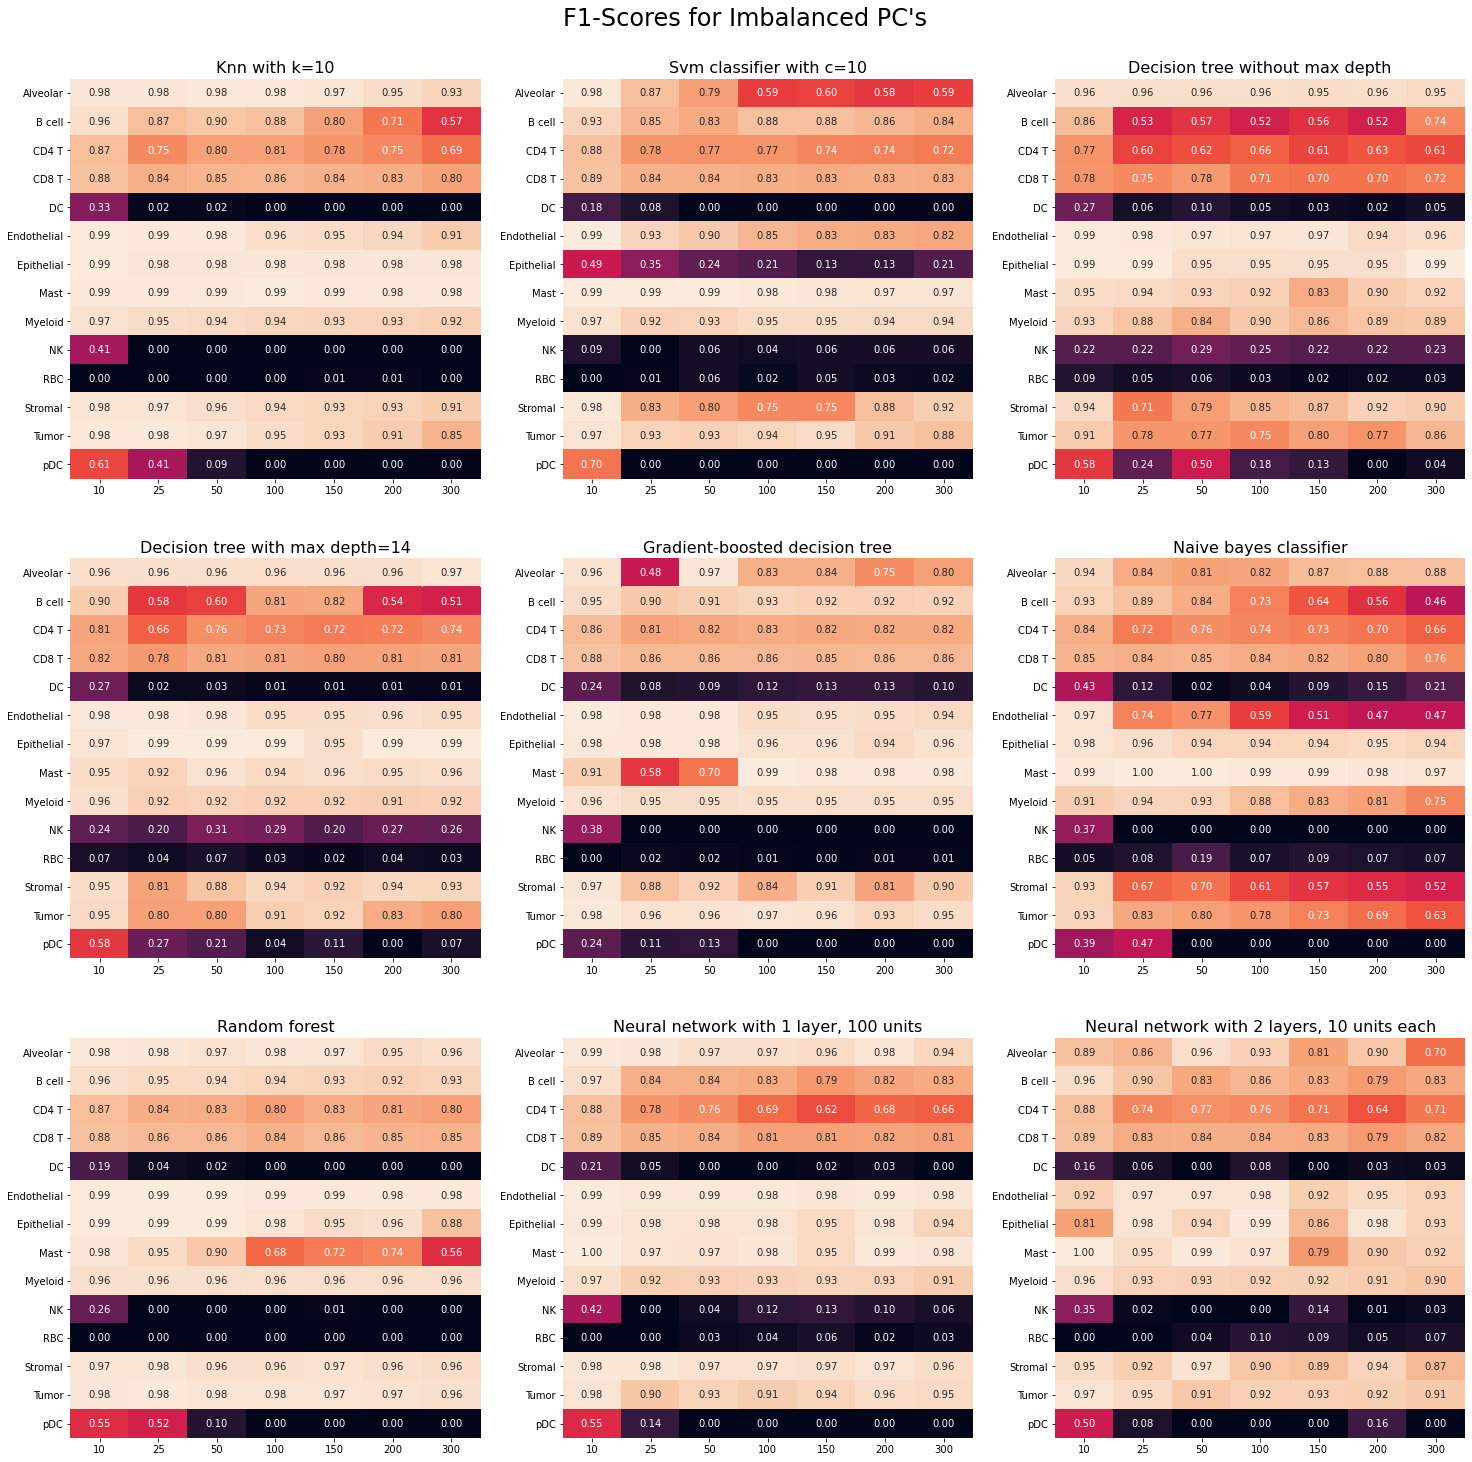

In [8]:
#Plot the F1-scores for the balanced PC's
non_dummy_models = ['kNN with k=10', 'SVM Classifier with C=10', 'Decision Tree without Max Depth', 'Decision Tree with Max Depth=14','Gradient-boosted Decision Tree',
                    'Naive Bayes Classifier', 'Random Forest', 'Neural Network with 1 layer, 100 units', 'Neural Network with 2 layers, 10 units each']
imbalanced_pcs = ['10 PCs_imbalanced', '25 PCs_imbalanced', '50 PCs_imbalanced', '100 PCs_imbalanced', '150 PCs_imbalanced', '200 PCs_imbalanced', '300 PCs_imbalanced']
f1_scores = summary_df.loc[:, pd.IndexSlice[non_dummy_models, imbalanced_pcs, ['f1-score']]]
imbalanced_f1_scores = {}

plt.rcParams["figure.figsize"] = (25,25)
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.ravel()
fig.suptitle("F1-Scores for Imbalanced PC's", fontsize=24, y=0.92)
counter = 0
for model in non_dummy_models:
    to_plot = f1_scores.loc[:, pd.IndexSlice[[model], imbalanced_pcs, :]]
    to_plot.columns = [val.split(" ")[0] for val in to_plot.columns.get_level_values(1)]
    sns.heatmap(to_plot, annot=True, cbar=False, ax=axs[counter], fmt='.2f')
    axs[counter].set_title(model.capitalize(), fontdict={'fontsize':16})
    imbalanced_f1_scores[model] = to_plot
    counter += 1
plt.savefig('figures/f1-scores_imbalanced_pcs.jpg', bbox_inches='tight')

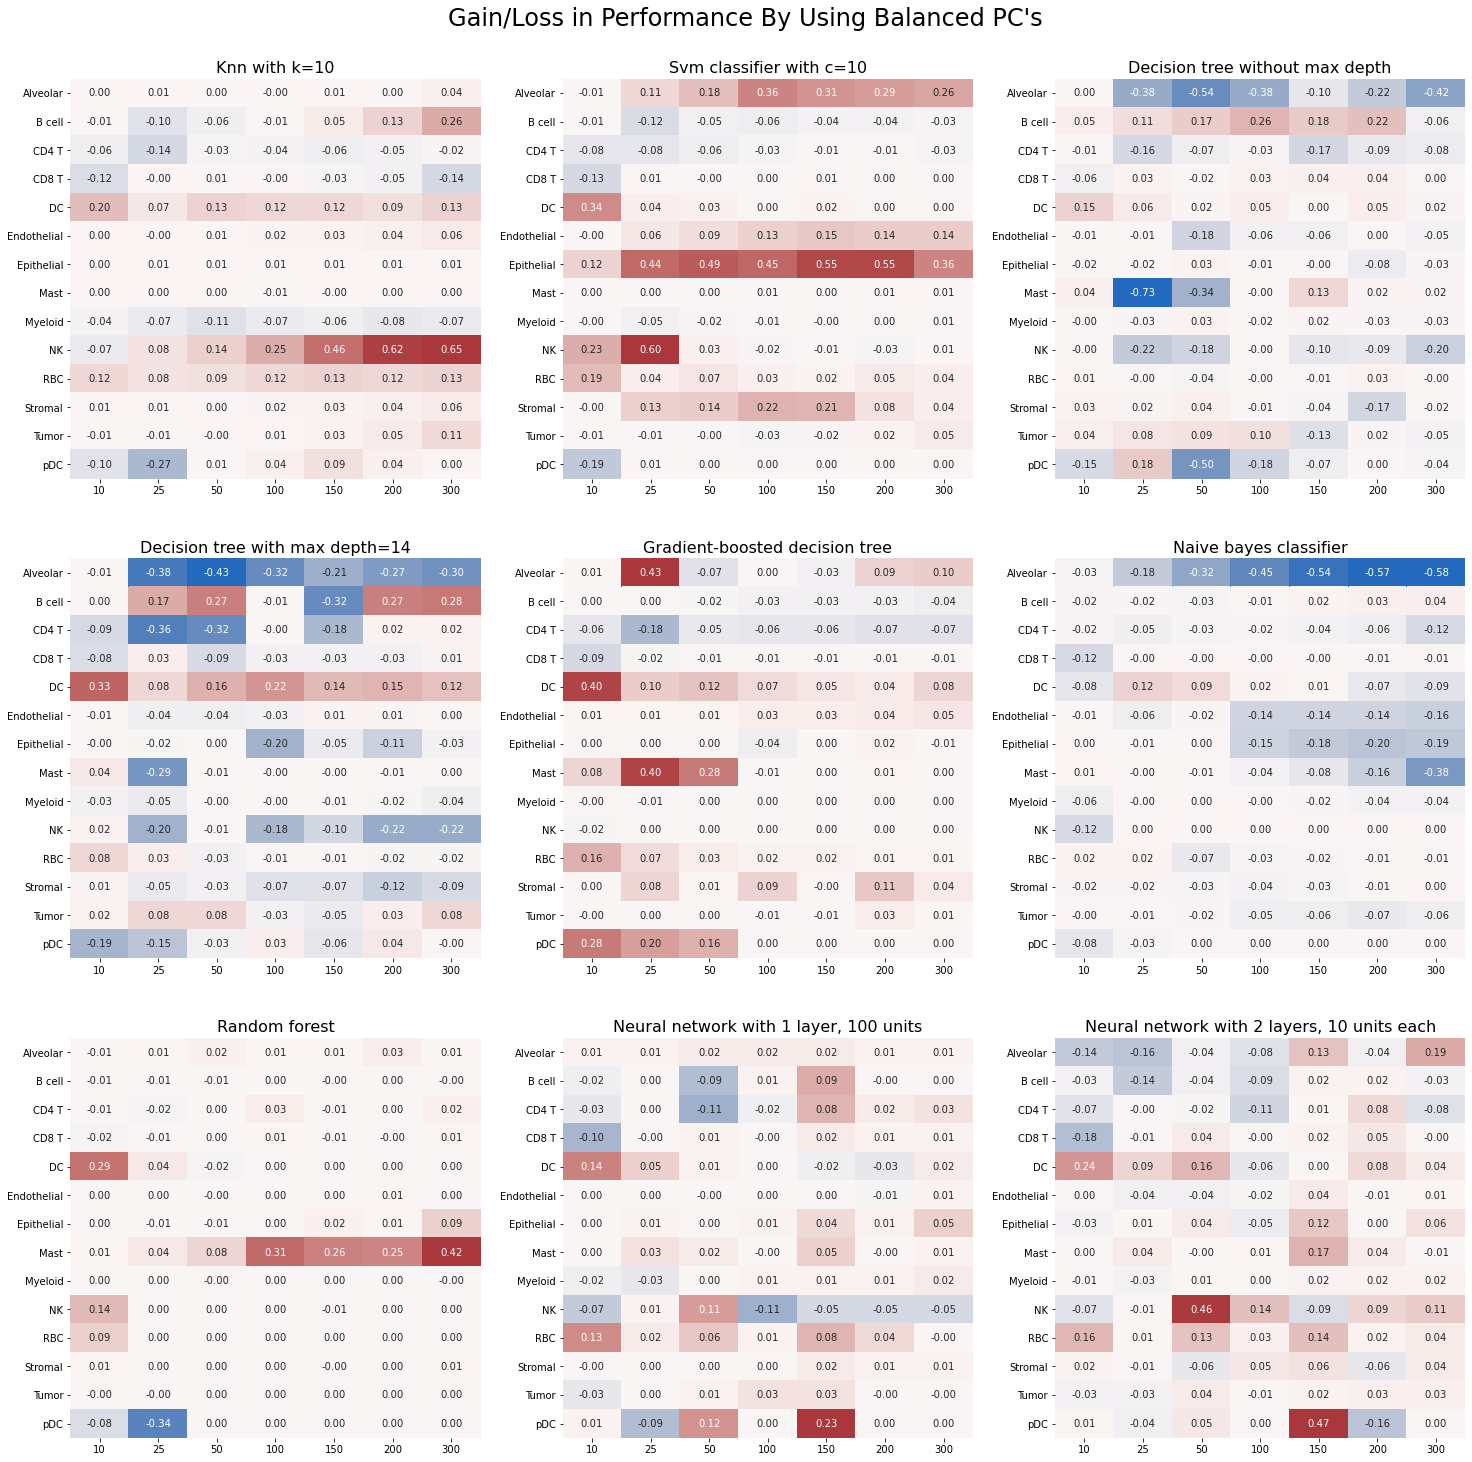

In [9]:
plt.rcParams["figure.figsize"] = (25,25)
fig, axs = plt.subplots(ncols=3, nrows=3)
axs = axs.ravel()
fig.suptitle("Gain/Loss in Performance By Using Balanced PC's", fontsize=24, y=0.92)
counter = 0

for model in balanced_f1_scores.keys():
    balanced_df = balanced_f1_scores[model]
    imbalanced_df = imbalanced_f1_scores[model]
    diff_df = pd.DataFrame(columns=balanced_df.columns, index=balanced_df.index)
    for col in balanced_df.columns:
        for row in balanced_df.index:
            diff_df.loc[row, col] = round((balanced_df.loc[row, col] - imbalanced_df.loc[row, col]), 2)
    diff_df = diff_df.astype(float)
    cmap = sns.color_palette("vlag", as_cmap=True)
    sns.heatmap(diff_df, annot=True, cbar=False, ax=axs[counter], fmt='.2f', cmap=cmap, center=0.0)
    axs[counter].set_title(model.capitalize(), fontdict={'fontsize':16})
    counter += 1
plt.savefig('figures/f1-scores_gain_loss.jpg', bbox_inches='tight')

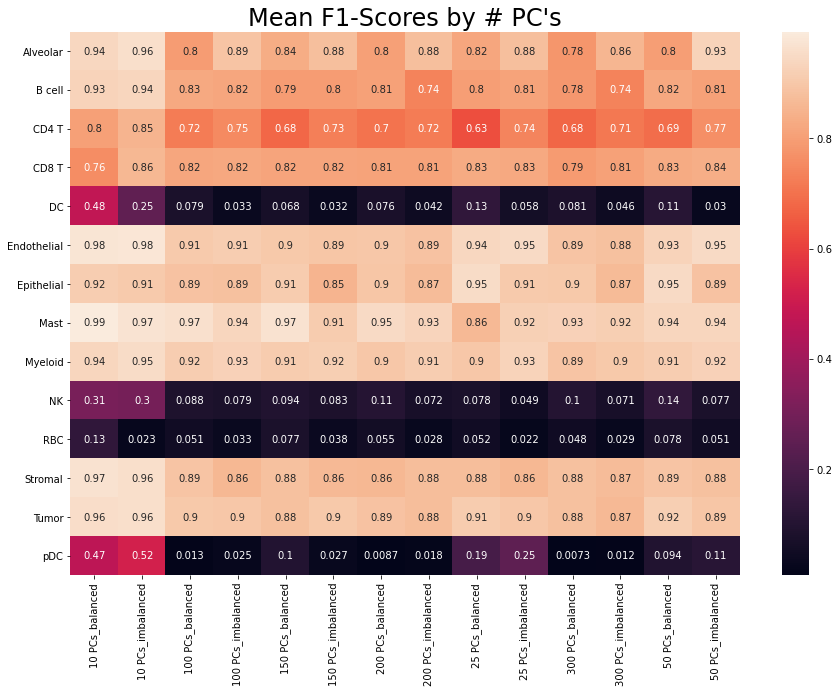

In [10]:
# Generate a heatmap at the PC-level using mean for all PC's
plt.rcParams["figure.figsize"] = (15,10)
summary_df_no_dummies = summary_df.loc[:, pd.IndexSlice[non_dummy_models, :, ['f1-score']]]
pc_grouped_df = summary_df_no_dummies.groupby(level=[1, 2], axis=1).mean()
pc_grouped_df_f1_score = pc_grouped_df.loc[:, pd.IndexSlice[:, ['f1-score']]]
pc_grouped_df_f1_score.columns = pc_grouped_df_f1_score.columns.get_level_values(0)
sns.heatmap(pc_grouped_df_f1_score, annot=True, xticklabels=1)
plt.title("Mean F1-Scores by # PC's", fontsize=24)
plt.savefig('figures/mean_f1-scores_by_pc.jpg', bbox_inches='tight')

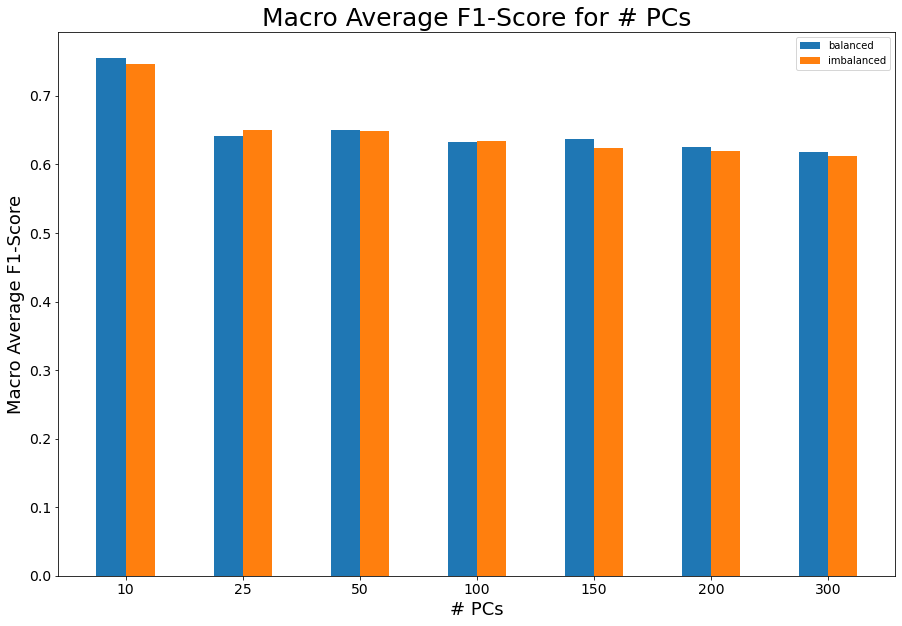

In [33]:
pc_f1_means = pc_grouped_df_f1_score.mean()

pc_f1_means_balanced = pc_f1_means.filter(regex='_balanced')
pc_f1_means_balanced.index = [int(i.split(" ")[0]) for i in pc_f1_means_balanced.index]
pc_f1_means_balanced.sort_index(inplace=True)

pc_f1_means_imbalanced = pc_f1_means.filter(regex='_imbalanced')
pc_f1_means_imbalanced.index = [int(i.split(" ")[0]) for i in pc_f1_means_imbalanced.index]
pc_f1_means_imbalanced.sort_index(inplace=True)

#Set the width of the bars
bar_width = 0.25
#Set the position of bar on X axis
r1 = np.arange(len(pc_f1_means_balanced))
r2 = [x + bar_width for x in r1]
# Make the plot
plt.bar(r1, pc_f1_means_balanced.values, width=bar_width, label='balanced')
plt.bar(r2, pc_f1_means_imbalanced.values, width=bar_width, label='imbalanced')
# Add xticks on the middle of the group bars
plt.xlabel('# PCs', fontsize=18)
plt.ylabel('Macro Average F1-Score', fontsize=18)
plt.xticks([r  + (bar_width/2) for r in range(len(pc_f1_means_balanced))], pc_f1_means_balanced.index, fontsize=14)
plt.yticks(fontsize=14)
plt.title('Macro Average F1-Score for # PCs', fontsize=25)
plt.legend()
plt.savefig('figures/macro_average_f1-score_pcs.jpg', bbox_inches='tight')

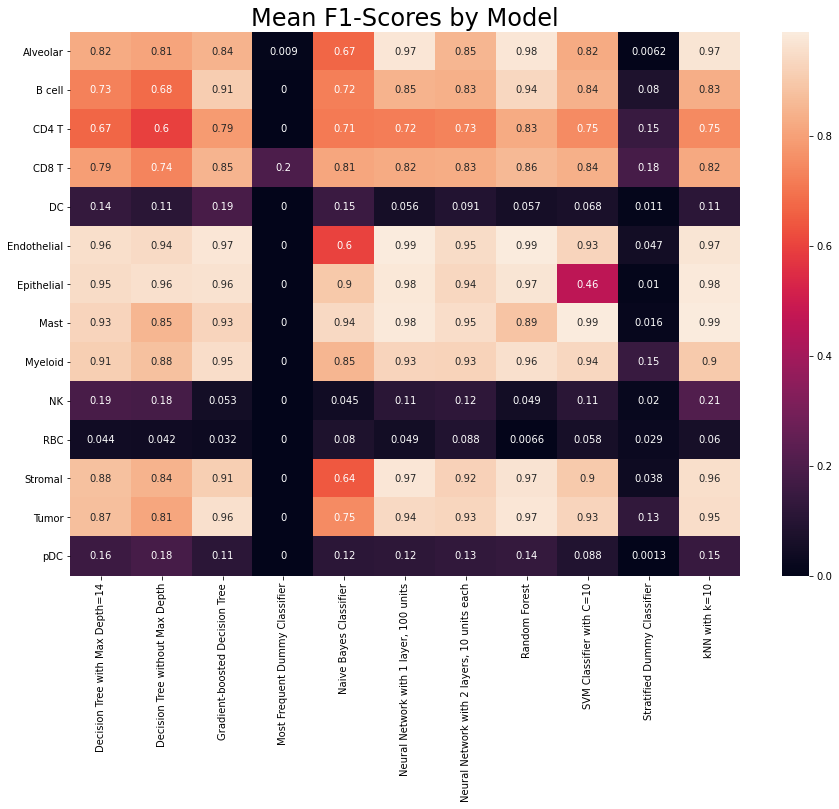

In [12]:
# Generate a heatmap at the model-level using mean for all PC's
plt.rcParams["figure.figsize"] = (15,10)
model_grouped_df = summary_df.groupby(level=[0, 2], axis=1).mean()
model_grouped_df_f1_score = model_grouped_df.loc[:, pd.IndexSlice[:, ['f1-score']]]
model_grouped_df_f1_score.columns = model_grouped_df_f1_score.columns.get_level_values(0)
sns.heatmap(model_grouped_df_f1_score, annot=True, xticklabels=1)
plt.title("Mean F1-Scores by Model", fontsize=24)
plt.savefig('figures/f1-scores_model.jpg', bbox_inches='tight')

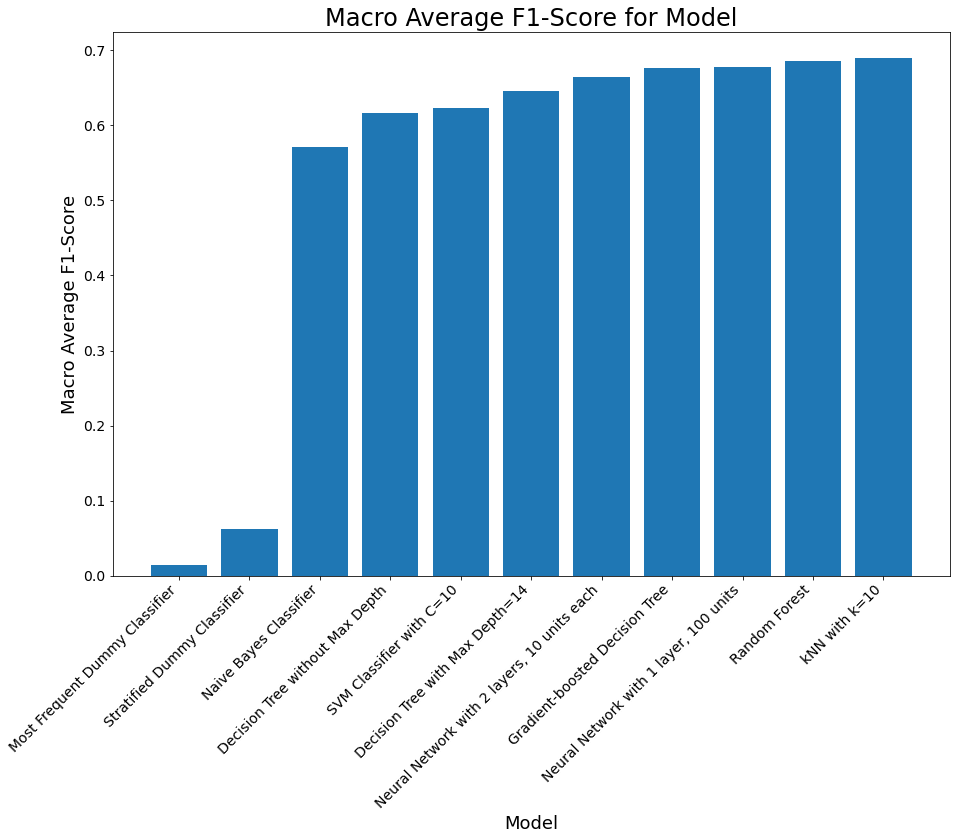

In [29]:
model_f1_means = model_grouped_df_f1_score.mean()
model_f1_std = model_grouped_df_f1_score.std()
model_f1_means = model_f1_means.sort_values()
model_f1_std = model_f1_std.reindex(model_f1_means.index)
plt.bar(model_f1_means.index, model_f1_means.values)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Macro Average F1-Score', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Macro Average F1-Score for Model', fontsize=24)
plt.savefig('figures/macro_average_f1-scores_model.jpg', bbox_inches='tight')

In [30]:
# Example of getting particular PC's for all models
# Notice how we go to the second level for the PC's and the third level for the particular metric
pc_10 = summary_df.loc[:, pd.IndexSlice[:, ['10 PCs_imbalanced', '10 PCs_balanced'], ['f1-score']]]
pc_10

Most Frequent Dummy Classifier                  \
                         10 PCs_imbalanced 10 PCs_balanced   
                                  f1-score        f1-score   
Alveolar                          0.000000        0.018076   
B cell                            0.000000        0.000000   
CD4 T                             0.000000        0.000000   
CD8 T                             0.397617        0.000000   
DC                                0.000000        0.000000   
Endothelial                       0.000000        0.000000   
Epithelial                        0.000000        0.000000   
Mast                              0.000000        0.000000   
Myeloid                           0.000000        0.000000   
NK                                0.000000        0.000000   
RBC                               0.000000        0.000000   
Stromal                           0.000000        0.000000   
Tumor                             0.000000        0.000000   
pDC                               0.000000        0.000000   

            Stratified Dummy Classifier                     kNN with k=10  \
                      10 PCs_imbalanced 10 PCs_balanced 10 PCs_imbalanced   
                               f1-score        f1-score          f1-score   
Alveolar                       0.000000        0.012453          0.978261   
B cell                         0.076741        0.083387          0.960621   
CD4 T                          0.205959        0.091880          0.874492   
CD8 T                          0.257681        0.110345          0.881403   
DC                             0.000000        0.021635          0.330709   
Endothelial                    0.047771        0.047037          0.990536   
Epithelial                     0.020408        0.000000          0.988235   
Mast                           0.008584        0.023256          0.987234   
Myeloid                        0.186681        0.114102          0.965610   
NK                             0.017094        0.023758          0.407273   
RBC                            0.030227        0.028571          0.000000   
Stromal                        0.036728        0.038722          0.975369   
Tumor                          0.147627        0.113541          0.980324   
pDC                            0.000000        0.002674          0.611111   

                            SVM Classifier with C=10                  \
            10 PCs_balanced        10 PCs_imbalanced 10 PCs_balanced   
                   f1-score                 f1-score        f1-score   
Alveolar           0.978495                 0.983607        0.973545   
B cell             0.953846                 0.931883        0.922034   
CD4 T              0.815615                 0.881676        0.804809   
CD8 T              0.758685                 0.885333        0.758910   
DC                 0.530973                 0.175439        0.516854   
Endothelial        0.992126                 0.992126        0.990536   
Epithelial         0.988235                 0.491228        0.612903   
Mast               0.991525                 0.991453        0.995745   
Myeloid            0.929674                 0.965499        0.965498   
NK                 0.340852                 0.085561        0.318841   
RBC                0.122942                 0.000000        0.191919   
Stromal            0.985413                 0.983713        0.978862   
Tumor              0.972445                 0.969079        0.962070   
pDC                0.507937                 0.702703        0.517241   

            Decision Tree without Max Depth                  ...  \
                          10 PCs_imbalanced 10 PCs_balanced  ...   
                                   f1-score        f1-score  ...   
Alveolar                           0.955056        0.956522  ...   
B cell                             0.862144        0.914684  ...   
CD4 T                              0.768966        0.759980  ...   
CD8 T         

In [15]:
test = pc_10.loc[:, pd.IndexSlice['kNN with k=10']]
test.columns = test.columns.get_level_values(0)
test['cell_type'] = test.index
test = test.melt(id_vars=['cell_type'], value_vars=['10 PCs_imbalanced', '10 PCs_balanced'])
test['algorithm'] = 'kNN with k=10'
test.sort_values(by=['cell_type'], inplace=True)
test

/home/miniebr1/miniconda2/envs/image_processing/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cell_type,variable,value,algorithm
0,Alveolar,10 PCs_imbalanced,0.978261,kNN with k=10
14,Alveolar,10 PCs_balanced,0.978495,kNN with k=10
1,B cell,10 PCs_imbalanced,0.960621,kNN with k=10
15,B cell,10 PCs_balanced,0.953846,kNN with k=10
2,CD4 T,10 PCs_imbalanced,0.874492,kNN with k=10
16,CD4 T,10 PCs_balanced,0.815615,kNN with k=10
3,CD8 T,10 PCs_imbalanced,0.881403,kNN with k=10
17,CD8 T,10 PCs_balanced,0.758685,kNN with k=10
4,DC,10 PCs_imbalanced,0.330709,kNN with k=10
18,DC,10 PCs_balanced,0.530973,kNN with k=10


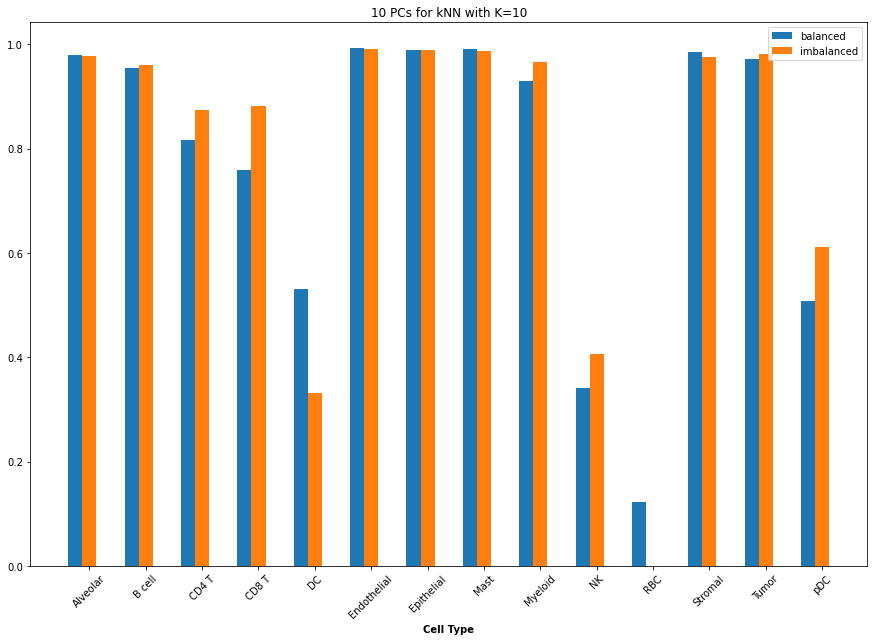

In [16]:
balanced = test[test['variable'] == '10 PCs_balanced']
imbalanced = test[test['variable'] == '10 PCs_imbalanced']

#Set the width of the bars
bar_width = 0.25
#Set the position of bar on X axis
r1 = np.arange(len(balanced['cell_type']))
r2 = [x + bar_width for x in r1]
# Make the plot
plt.bar(r1, balanced['value'], width=bar_width, label='balanced')
plt.bar(r2, imbalanced['value'], width=bar_width, label='imbalanced')
# Add xticks on the middle of the group bars
plt.xlabel('Cell Type', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(balanced['value']))], balanced['cell_type'], rotation=45)
plt.title('10 PCs for kNN with K=10')
plt.legend()